In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib as mpl
mpl.rcParams['figure.figsize']   = (18,10)
mpl.rcParams['font.size']        = 25 # standard er 45
mpl.rcParams['lines.color']      = 'r'
mpl.rcParams['lines.markersize'] = 15
plt.rcParams['figure.constrained_layout.use'] = True
import glob


path = os.getcwd()


In [32]:
folder = 'small_scan1'
n_folders = 90


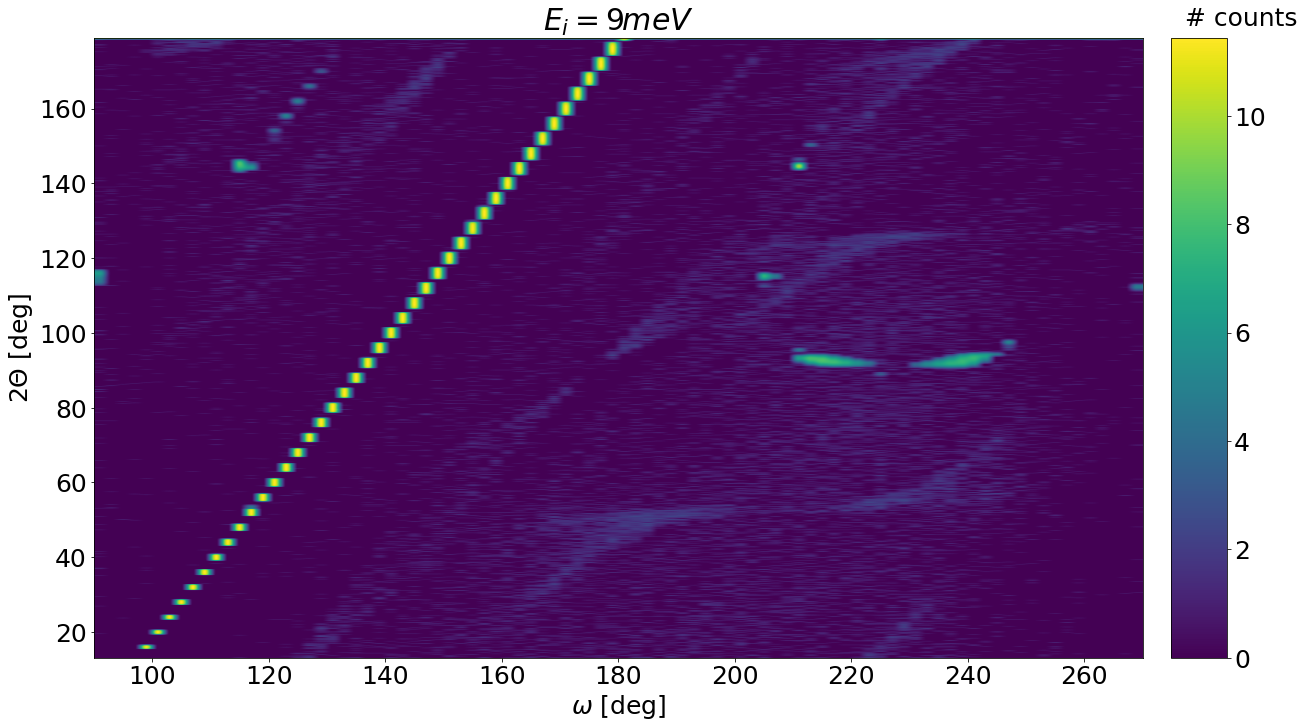

In [33]:
nul = "0"

file = "My_data.th"

locations = []

matrix = []

for nr in range(n_folders):
    temp = os.getcwd()+"/"+str(folder)+"/"+ str(nr) +"/"+ file
    locations.append(temp)
  


for i in locations:
    data = open(i)
    n0 = []
    for line in data:
        if not (line.startswith("#")):
            line_of_values = line.split(' ')
            if line_of_values[len(line_of_values)-1] == '\n':
                line_of_values.pop()
            n0.append(line_of_values)
    n0 = np.asarray(n0, dtype=float)
    
    Ix = []
    theta = []
    scale = 3

    for a in n0:
        if a[scale] != 0:
            Ix.append(np.log(a[scale]))
        if a[scale] == 0:
            Ix.append(a[scale])
    for b in n0:
        theta.append(b[0])


    matrix.append(Ix)
 

mat = np.asmatrix(matrix)  
mat = np.rot90(mat, k=1, axes=(0, 1))
mat = np.flipud(mat)

   

im=plt.imshow(mat,aspect='auto', extent=[90,270,13.09,178.89])
plt.xlabel('$\omega$ [deg]')
plt.ylabel('2$\Theta$ [deg]')
plt.title('$E_i = 9 meV$')
clb = plt.colorbar(im)
clb.set_label('# counts', labelpad=-25, y=1.05, rotation=0)
plt.savefig('3p1_test1.pdf')
plt.show()